<a href="https://colab.research.google.com/github/sunnyyashu178/DataScience-Projects/blob/master/Gradient_descent_manually.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)
index = len(X)
df = pd.DataFrame()
df["X"] = X.reshape(100,)
df["y"] = y
df

,X,y
0,1.589355,10.161865
1,0.906701,8.049958
2,1.285028,7.648217
3,0.884154,6.596610
4,0.548622,7.815439
...,...,...
95,0.610007,5.669765
96,0.126643,3.558816
97,0.077986,5.397268
98,0.929446,8.397306


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


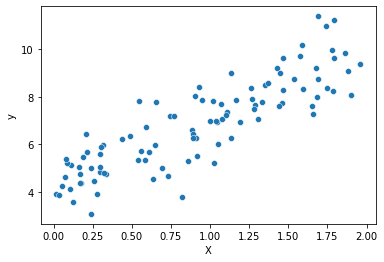

In [61]:
sns.scatterplot("X","y",data = df)

In [62]:
X_b = np.c_[np.ones((100,1)),X]   # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [63]:
theta_best

array([[4.23225264],
       [2.83024189]])

The actual function that we used to generate the data is y = 4 + 3X + Gaussian noise.  Close
enough, but the noise made it impossible to recover the exact parameters of the origi‐
nal function.
Now you can make predictions using θ:


In [64]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.23225264],
       [9.89273642]])

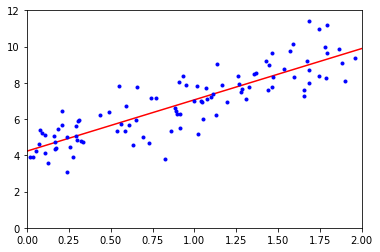

In [65]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,12])
plt.show()

# Batch Gradient

In [109]:
eta = 0.1
n_iterations = 1000
m = 100

In [110]:
theta = np.random.randn(2,1)
theta  # random initialization

array([[0.33877877],
       [1.97608798]])

array([[4.23225264],
       [2.83024189]])

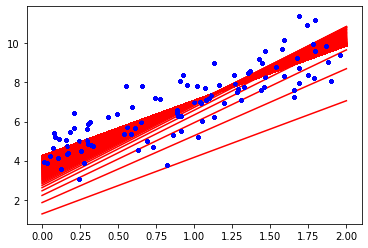

In [111]:
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta-eta *gradients
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)),X_new]
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new,y_predict,"r-")
  plt.plot(X,y,"b.")
theta

In [112]:
gradients

array([[-3.83693077e-15],
       [ 1.67088565e-15]])

In [113]:
theta

array([[4.23225264],
       [2.83024189]])

# Stochastic Gradient Descent

In [166]:
n_epochs = 50
t0 , t1 = 5, 50  # learning schedule hyperparameters
m = 100

In [167]:
def learning_schedule(t):
  return t0/(t + t1)

In [168]:
theta = np.random.randn(2,1)

In [169]:
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch* m+i)
    theta = theta-eta*gradients

In [170]:
theta

array([[4.21546401],
       [2.85063888]])

# SGDRegressor

In [181]:
from sklearn.linear_model import SGDRegressor

In [182]:
sgd_reg = SGDRegressor(penalty=None,n_iter_no_change=50,eta0=0.1)

In [186]:
sgd_reg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [187]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.23442125]), array([2.82107409]))

# Linear Regression using scikit-learn

In [114]:
df.head()

,X,y
0,1.589355,10.161865
1,0.906701,8.049958
2,1.285028,7.648217
3,0.884154,6.596610
4,0.548622,7.815439


In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lin_reg = LinearRegression()

In [117]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
lin_reg.intercept_

array([4.23225264])

In [119]:
lin_reg.coef_

array([[2.83024189]])

In [120]:
lin_reg.predict([[2]])

array([[9.89273642]])